# <div style="color:green;display:inline-block;border-radius:5px;background-color:#F0E68C;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:green;overflow:hidden;font-size:70%;letter-spacing:0.5px;margin:0"><b> </b>인공지능 수업-추가로 해본 작업들</p></div>

<h2 style="color: #FF5722;">추가 작업은 마크다운에 [추가로 한 작업]으로 표시했습니다.</h2>

**적용 모델**

- MLP (Multi Layer Perceptron)

- CNN (Convolutional Neural Network)

- LSTM (Long Short-Term Memory)

**라이브러리 준비하기**

In [1]:
#라이브러리 적용

import matplotlib
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Conv1D, MaxPooling1D, Flatten, SimpleRNN, LSTM, TimeDistributed
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow_addons.metrics import RSquare

**데이터 준비하기**

In [2]:
# csv 테이터 로드하기
df_enso = pd.read_csv('/kaggle/input/enso-data/ENSO.csv', parse_dates=[0])
df_enso.head()

,Date,Year,Month,Global Temperature Anomalies,Nino 1+2 SST,Nino 1+2 SST Anomalies,Nino 3 SST,Nino 3 SST Anomalies,Nino 3.4 SST,Nino 3.4 SST Anomalies,...,TNI,PNA,OLR,SOI,Season (2-Month),MEI.v2,Season (3-Month),ONI,Season (12-Month),ENSO Phase-Intensity
0,1950-01-01,1950,JAN,-0.20,NaN,NaN,NaN,NaN,NaN,NaN,...,0.624,-3.65,NaN,NaN,DJ,NaN,DJF,-1.5,1950-1951,ML
1,1950-02-01,1950,FEB,-0.26,NaN,NaN,NaN,NaN,NaN,NaN,...,0.445,-1.69,NaN,NaN,JF,NaN,JFM,-1.3,1950-1951,ML
2,1950-03-01,1950,MAR,-0.08,NaN,NaN,NaN,NaN,NaN,NaN,...,0.382,-0.06,NaN,NaN,FM,NaN,FMA,-1.2,1950-1951,ML
3,1950-04-01,1950,APR,-0.16,NaN,NaN,NaN,NaN,NaN,NaN,...,0.311,-0.23,NaN,NaN,MA,NaN,MAM,-1.2,1950-1951,ML
4,1950-05-01,1950,MAY,-0.02,NaN,NaN,NaN,NaN,NaN,NaN,...,0.124,-0.40,NaN,NaN,AM,NaN,AMJ,-1.1,1950-1951,ML


In [3]:
df_enso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          882 non-null    datetime64[ns]
 1   Year                          882 non-null    int64         
 2   Month                         882 non-null    object        
 3   Global Temperature Anomalies  882 non-null    float64       
 4   Nino 1+2 SST                  498 non-null    float64       
 5   Nino 1+2 SST Anomalies        498 non-null    float64       
 6   Nino 3 SST                    498 non-null    float64       
 7   Nino 3 SST Anomalies          498 non-null    float64       
 8   Nino 3.4 SST                  498 non-null    float64       
 9   Nino 3.4 SST Anomalies        498 non-null    float64       
 10  Nino 4 SST                    498 non-null    float64       
 11  Nino 4 SST Anomalies          49

In [4]:
# null 값 계산
df_enso.isna().sum(axis=0)

Date                              0
Year                              0
Month                             0
Global Temperature Anomalies      0
Nino 1+2 SST                    384
Nino 1+2 SST Anomalies          384
Nino 3 SST                      384
Nino 3 SST Anomalies            384
Nino 3.4 SST                    384
Nino 3.4 SST Anomalies          384
Nino 4 SST                      384
Nino 4 SST Anomalies            384
TNI                               7
PNA                               0
OLR                             308
SOI                              12
Season (2-Month)                  0
MEI.v2                          348
Season (3-Month)                  0
ONI                               0
Season (12-Month)                 0
ENSO Phase-Intensity              6
dtype: int64

In [5]:
df_enso.describe()

,Date,Year,Global Temperature Anomalies,Nino 1+2 SST,Nino 1+2 SST Anomalies,Nino 3 SST,Nino 3 SST Anomalies,Nino 3.4 SST,Nino 3.4 SST Anomalies,Nino 4 SST,Nino 4 SST Anomalies,TNI,PNA,OLR,SOI,MEI.v2,ONI
count,882,882.000000,882.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,498.000000,875.000000,882.000000,574.0000,870.000000,534.000000,882.000000
mean,1986-09-15 21:24:53.877551040,1986.251701,0.337971,23.250542,-0.049859,25.967731,-0.065743,27.016325,-0.079859,28.451727,-0.100904,-0.418517,-0.109002,0.0500,0.154138,-0.067228,-0.003175
min,1950-01-01 00:00:00,1950.000000,-0.370000,19.060000,-1.900000,23.380000,-2.160000,24.560000,-2.220000,26.360000,-1.870000,-3.376000,-3.650000,-2.8000,-3.600000,-2.500000,-2.000000
25%,1968-05-08 18:00:00,1968.000000,0.060000,21.220000,-0.740000,24.985000,-0.650000,26.340000,-0.670000,28.000000,-0.570000,-1.458500,-0.787500,-0.6000,-0.400000,-0.800000,-0.600000
50%,1986-09-16 00:00:00,1986.000000,0.300000,23.140000,-0.240000,25.935000,-0.170000,27.060000,-0.110000,28.560000,-0.020000,-0.497000,-0.080000,0.1000,0.200000,-0.100000,-0.100000
75%,2005-01-24 06:00:00,2005.000000,0.610000,25.230000,0.440000,26.902500,0.417500,27.690000,0.440000,28.977500,0.370000,0.384500,0.600000,0.7000,0.800000,0.500000,0.500000
max,2023-06-01 00:00:00,2023.000000,1.340000,28.510000,4.030000,28.810000,3.070000,29.540000,2.720000,30.220000,1.550000,4.227000,2.870000,2.3000,2.900000,2.700000,2.600000
std,NaN,21.230643,0.345478,2.328832,1.046806,1.233975,0.853805,0.945222,0.829843,0.679232,0.634455,1.361371,1.034818,0.9789,0.940521,0.987631,0.832301


In [6]:
# 인덱스 세팅
df_enso.set_index('Date', inplace = True)
df_enso.head(5)

,Year,Month,Global Temperature Anomalies,Nino 1+2 SST,Nino 1+2 SST Anomalies,Nino 3 SST,Nino 3 SST Anomalies,Nino 3.4 SST,Nino 3.4 SST Anomalies,Nino 4 SST,...,TNI,PNA,OLR,SOI,Season (2-Month),MEI.v2,Season (3-Month),ONI,Season (12-Month),ENSO Phase-Intensity
Date,,,,,,,,,,,,,,,,,,,,,
1950-01-01,1950,JAN,-0.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.624,-3.65,NaN,NaN,DJ,NaN,DJF,-1.5,1950-1951,ML
1950-02-01,1950,FEB,-0.26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.445,-1.69,NaN,NaN,JF,NaN,JFM,-1.3,1950-1951,ML
1950-03-01,1950,MAR,-0.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.382,-0.06,NaN,NaN,FM,NaN,FMA,-1.2,1950-1951,ML
1950-04-01,1950,APR,-0.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.311,-0.23,NaN,NaN,MA,NaN,MAM,-1.2,1950-1951,ML
1950-05-01,1950,MAY,-0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.124,-0.40,NaN,NaN,AM,NaN,AMJ,-1.1,1950-1951,ML


In [7]:
# ENSO 예측에 사용될 특성을 골라 indicators리스트에 저장
# 제외된 열 이외 csv 파일에 있는 열들을 'indicators’ 리스트에 저장

indicators = [col for col in df_enso.columns if col not in {'Year',
                                                            'Month',
                                                            'Global Temperature Anomalies',
                                                            'Season (2-Month)',
                                                            'Season (3-Month)',
                                                            'Season (12-Month)',
                                                            'ENSO Phase-Intensity'}]
indicators

['Nino 1+2 SST',
 'Nino 1+2 SST Anomalies',
 'Nino 3 SST',
 'Nino 3 SST Anomalies',
 'Nino 3.4 SST',
 'Nino 3.4 SST Anomalies',
 'Nino 4 SST',
 'Nino 4 SST Anomalies',
 'TNI',
 'PNA',
 'OLR',
 'SOI',
 'MEI.v2',
 'ONI']

**데이터 시각화**

# <div style="color:green;display:inline-block;border-radius:5px;background-color:#F0E68C;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:green;overflow:hidden;font-size:70%;letter-spacing:0.5px;margin:0"><b> </b>추가로 한 작업1</p></div>

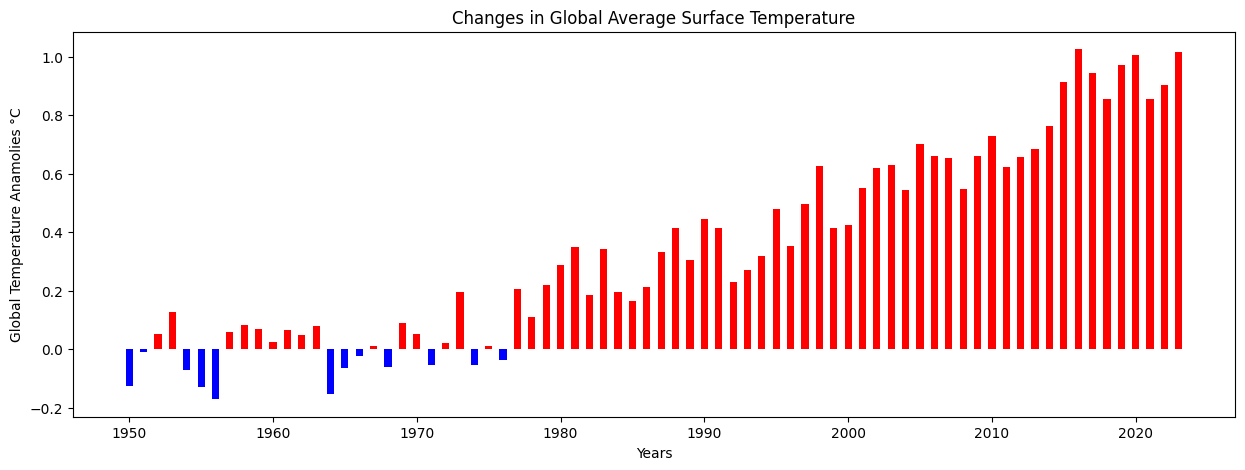

In [8]:
# 추가로 한 작업
# 전세계 평균 표면 온도 연간 변화 막대 그래프 생성
# 'Year’로 그룹화하고, 연간 이상치를 계산

annual_anamoly = df_enso.groupby('Year')['Global Temperature Anomalies'].mean()
plt.figure(figsize=(15, 5))
plt.bar(x = df_enso.Year.unique(), 
        height = annual_anamoly,
        width = 0.5,
        color = ['r' if val > 0 else 'b' for val in annual_anamoly])
plt.xlabel('Years')
plt.ylabel('Global Temperature Anamolies °C')
plt.title('Changes in Global Average Surface Temperature')
# plt.savefig('global temperature changes.png')
plt.show()

# <div style="color:green;display:inline-block;border-radius:5px;background-color:#F0E68C;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:green;overflow:hidden;font-size:70%;letter-spacing:0.5px;margin:0"><b> </b>추가로 한 작업2</p></div>

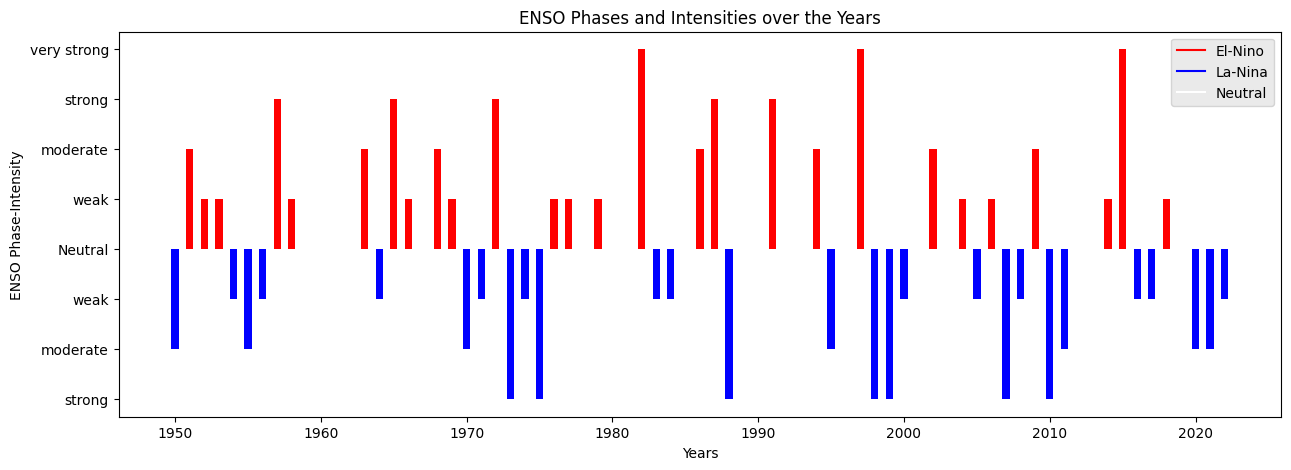

In [9]:
# ENSO 인코딩
encoding_enso = {'VSE': 2.0,
                 'SE': 1.5,
                 'ME': 1.0,
                 'WE': 0.5,
                 'N': 0,
                 'WL': -0.5,
                 'ML': -1,
                 'SL': -1.5}
encoded_enso = df_enso['ENSO Phase-Intensity'][::12].map(encoding_enso)

# 추가로 한 작업
# ENSO 지표를 숫자로 변환하여 연도별 ENSO 상태를 막대 그래프로 시각화
plt.figure(figsize=(15, 5))
plt.bar(x = df_enso.Year.unique(), 
        height = encoded_enso, 
        width = 0.5,
        color = ['r' if val > 0 else 'b' for val in encoded_enso])
plt.xlabel('Years')
plt.ylabel('ENSO Phase-Intensity')
plt.title('ENSO Phases and Intensities over the Years')

plt.yticks(ticks = np.arange(-1.5, 2.5, 0.5), 
           labels = ['strong', 'moderate', 'weak', 'Neutral', 
                     'weak', 'moderate', 'strong', 'very strong'])

line_red = matplotlib.lines.Line2D([0], [0], label='El-Nino', color='r')
line_blue = matplotlib.lines.Line2D([0], [0], label='La-Nina', color='b')
line_white = matplotlib.lines.Line2D([0], [0], label='Neutral', color='w')
plt.legend(handles=[line_red, line_blue, line_white], facecolor='#e5e5e5', loc='upper right')

plt.show()

# <div style="color:green;display:inline-block;border-radius:5px;background-color:#F0E68C;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:green;overflow:hidden;font-size:70%;letter-spacing:0.5px;margin:0"><b> </b>추가로 한 작업3</p></div>

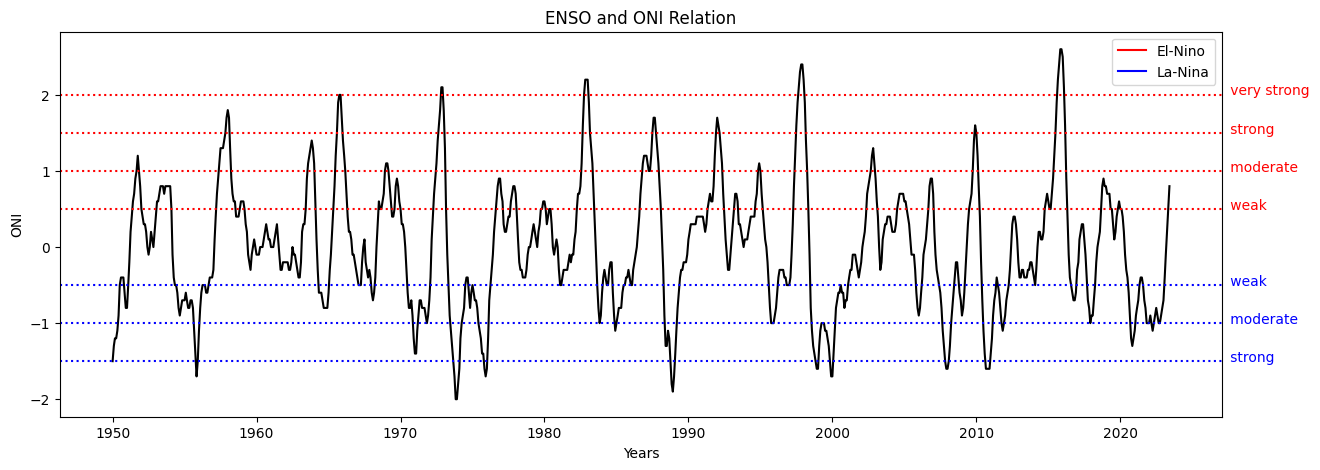

In [10]:
# 추가로 한 작업

plt.figure(figsize=(15, 5))

x = matplotlib.dates.date2num(df_enso.index)

plt.plot(df_enso.ONI, color='black')
plt.xlabel('Years')
plt.ylabel('ONI')
plt.title('ENSO and ONI Relation')

plt.axhline(y=2, color='r', linestyle=':')
plt.text(x=x[-1], y=2, color='red', s='              very strong')

plt.axhline(y=1.5, color='r', linestyle=':')
plt.text(x=x[-1], y=1.5, color='red', s='              strong')

plt.axhline(y=1, color='r', linestyle=':')
plt.text(x[-1], 1, color='r', s='              moderate')

plt.axhline(y=0.5, color='r', linestyle=':')
plt.text(x[-1], 0.5, color='r', s='              weak')

plt.axhline(y=-0.5, color='b', linestyle=':')
plt.text(x[-1], -0.5, color='b', s='              weak')

plt.axhline(y=-1, color='b', linestyle=':')
plt.text(x[-1], -1, color='b', s='              moderate')

plt.axhline(y=-1.5, color='b', linestyle=':')
plt.text(x[-1], -1.5, color='b', s='              strong')

line_red = matplotlib.lines.Line2D([0], [0], label='El-Nino', color='r')
line_blue = matplotlib.lines.Line2D([0], [0], label='La-Nina', color='b')
plt.legend(handles=[line_red, line_blue])

plt.show()

# <div style="color:green;display:inline-block;border-radius:5px;background-color:#F0E68C;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:green;overflow:hidden;font-size:70%;letter-spacing:0.5px;margin:0"><b> </b>추가로 한 작업4</p></div>

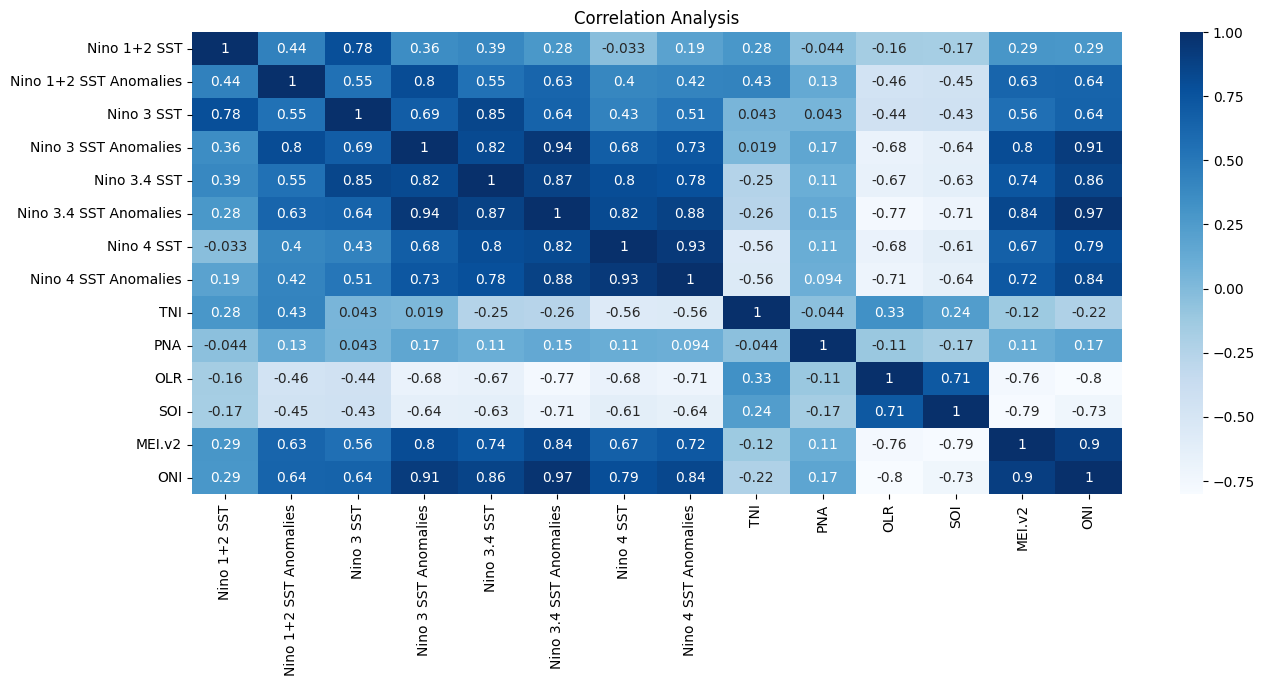

In [11]:
# 추가로 한 작업
# ENSO 지표들 간 상관 관계 분석
# heatmap 함수를 사용하여 상관 관계의 히트맵 생성

plt.figure(figsize=(15, 6))
sns.heatmap(df_enso[indicators].corr(), annot=True, cmap='Blues')
plt.title('Correlation Analysis')
plt.show()

**데이터 전처리**

In [12]:
# 주요 ENSO 요소들 선정
indicators = ['Nino 3.4 SST Anomalies', 'OLR', 'SOI', 'MEI.v2', 'ONI']

In [13]:
# 주요 ENSO 요소들의 null값 확인
df_enso[indicators].isna().sum(axis=0)

Nino 3.4 SST Anomalies    384
OLR                       308
SOI                        12
MEI.v2                    348
ONI                         0
dtype: int64

In [14]:
# Nino 3.4 SST 결측값을 ONI 값으로 채우기
df_enso['Nino 3.4 SST Anomalies'].fillna(df_enso['ONI'], inplace=True)

In [15]:
# 결측값 인코딩으로 바꾸기
df_enso['MEI.v2'].fillna(df_enso['ENSO Phase-Intensity'].map(encoding_enso), inplace=True)

In [16]:
# 결측값을 ENSO 유형 인코딩 값으로 채우기
encoding_enso = {'VSE': -2,
                 'SE': -1.5,
                 'ME': -1.0,
                 'WE': -0.5,
                 'N': 0,
                 'WL': 0.5,
                 'ML': 1,
                 'SL': 1.5}

df_enso['SOI'].fillna(df_enso['ENSO Phase-Intensity'].map(encoding_enso), inplace=True)
df_enso['OLR'].fillna(df_enso['ENSO Phase-Intensity'].map(encoding_enso), inplace=True)

In [17]:
df_enso[indicators].isna().sum(axis=0)

Nino 3.4 SST Anomalies    0
OLR                       0
SOI                       0
MEI.v2                    0
ONI                       0
dtype: int64

In [18]:
# 시계열 데이터를 지도 학습 데이터셋으로 변환
# 시계열 데이터를 입력 (x) 및 출력 (y) 시퀀스로 변환
# 각 변수에 대해 입력 시퀀스 (t-n, … t-1), 현재 시간 단계 (t), 그리고 예측 시퀀스 (t+1, … t+n)를 생성
# 생성된 시퀀스를 데이터프레임으로 반환
# 필요한 경우 NaN 값 제거

def series_to_supervised(data, n_in=1, n_out=1, n_vars=1, forecast_all=True, 
                         dropnan=True):
    
    cols, names = list(), list()
    
    if n_vars == 1:    # univariate
        # input sequence or previous timesteps (t-n, ... t-1)
        for i in range(n_in, 0, -1):
            cols.append(data.shift(i))
            names.append(f'var1 (t-{i})')
        # current time steps (t)
        cols.append(data)
        names.append('var1 (t)')
        # forecast sequence or next timesteps (t+1, ... t+n)
        for i in range(1, n_out):
            cols.append(data.shift(-i))
            names.append(f'var1 (t+{i})')
    elif forecast_all:    # mutlivariate type 1
        for i in range(n_in, 0, -1):
            cols.append(data.shift(i))
            names += [f'var{j+1} (t-{i})' for j in range(n_vars)]
        cols.append(data)
        names += [f'var{j+1} (t)' for j in range(n_vars)]
        for i in range(1, n_out):
            cols.append(data.shift(-i))
            names += [f'var{j+1} (t+{i})'for j in range(n_vars)]
    else:    # multivariate type 2
        for i in range(n_in, 0, -1):
            cols.append(data.shift(i))
            names += [f'var{j+1} (t-{i})' for j in range(n_vars)]
        cols.append(data.iloc[:, -1])
        names.append('VAR (t)')
        for i in range(1, n_out):
            cols.append(data.shift(-i).iloc[:,-1])
            names.append(f'VAR (t+{i})')
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [19]:
# 12개월의 이전 시간 단계를 입력으로 사용, 다음 3개월의 시간 단계를 출력으로 사용
# 12개월의 이전 ONI 값으로 다음 3개월의 ONI 값을 예측

n_in = 12
n_out = 3

In [20]:
# n_steps는 입력 시퀀스의 길이 / n_in과 동일
# n_features는 사용하는 특성의 수

n_steps = n_in                  
n_features = len(indicators)

In [21]:
# 시계열 데이터를 지도 학습 데이터로 변환
df_reframed = series_to_supervised(df_enso[indicators], n_in, n_out, n_features, 
                                   False)
df_reframed

,var1 (t-12),var2 (t-12),var3 (t-12),var4 (t-12),var5 (t-12),var1 (t-11),var2 (t-11),var3 (t-11),var4 (t-11),var5 (t-11),...,var4 (t-2),var5 (t-2),var1 (t-1),var2 (t-1),var3 (t-1),var4 (t-1),var5 (t-1),VAR (t),VAR (t+1),VAR (t+2)
Date,,,,,,,,,,,,,,,,,,,,,
1951-01-01,-1.50,1.0,1.0,-1.0,-1.5,-1.30,1.0,1.0,-1.0,-1.3,...,-1.0,-0.6,-0.80,1.0,1.0,-1.0,-0.8,-0.8,-0.5,-0.2
1951-02-01,-1.30,1.0,1.0,-1.0,-1.3,-1.20,1.0,1.0,-1.0,-1.2,...,-1.0,-0.8,-0.80,-1.0,1.5,1.0,-0.8,-0.5,-0.2,0.2
1951-03-01,-1.20,1.0,1.0,-1.0,-1.2,-1.20,1.0,1.0,-1.0,-1.2,...,1.0,-0.8,-0.50,-1.0,0.9,1.0,-0.5,-0.2,0.2,0.4
1951-04-01,-1.20,1.0,1.0,-1.0,-1.2,-1.10,1.0,1.0,-1.0,-1.1,...,1.0,-0.5,-0.20,-1.0,-0.1,1.0,-0.2,0.2,0.4,0.6
1951-05-01,-1.10,1.0,1.0,-1.0,-1.1,-0.90,1.0,1.0,-1.0,-0.9,...,1.0,-0.2,0.20,-1.0,-0.3,1.0,0.2,0.4,0.6,0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-01,-1.05,1.1,1.5,-1.2,-1.0,-0.83,1.1,0.5,-1.1,-1.0,...,-1.7,-1.0,-0.93,1.3,0.3,-1.5,-0.9,-0.8,-0.7,-0.4
2023-01-01,-0.83,1.1,0.5,-1.1,-1.0,-0.71,1.6,1.1,-1.0,-0.9,...,-1.5,-0.9,-0.84,1.7,2.1,-1.2,-0.8,-0.7,-0.4,-0.1
2023-02-01,-0.71,1.6,1.1,-1.0,-0.9,-0.89,1.8,1.8,-1.3,-1.0,...,-1.2,-0.8,-0.69,1.8,1.4,-1.1,-0.7,-0.4,-0.1,0.2


**데이터 분할**

In [22]:
# 훈련, 검증, 테스트 세트로 분할 8:1:1
n = df_reframed.shape[0]       
n_train, n_valid = int(0.8 * n), int(0.1 * n)
df_train = df_reframed.values[:n_train, :]
df_valid = df_reframed.values[n_train:n_train + n_valid, :]
df_test = df_reframed.values[n_train + n_valid:, :]

In [23]:
x_train, y_train,= df_train[:, :-n_out], df_train[:, -n_out:]
x_valid, y_valid = df_valid[:, :-n_out], df_valid[:, -n_out:]
x_test, y_test =  df_test[:, :-n_out], df_test[:, -n_out:]

In [24]:
# 데이터 정규화
x_scaler = MinMaxScaler(feature_range=(0,1))
y_scaler =  MinMaxScaler(feature_range=(0,1))

x_train, y_train = x_scaler.fit_transform(x_train), y_scaler.fit_transform(y_train)
x_valid, y_valid = x_scaler.transform(x_valid), y_scaler.transform(y_valid)
x_test, y_test = x_scaler.transform(x_test), y_scaler.transform(y_test)

In [25]:
models = ['MLP', 'CNN', 'LSTM']

# <div style="color:green;display:inline-block;border-radius:5px;background-color:#F0E68C;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:green;overflow:hidden;font-size:70%;letter-spacing:0.5px;margin:0"><b> </b>추가로 한 작업5</p></div>

**모델 개발 및 교육훈련**
- 모델 개발 및 비교 코드들은 모두 추가로 한 작업들 입니다.

**1. MLP**

In [26]:
# 모델 빌드
model_mlp = Sequential(name='mlp')
model_mlp.add(Dense(units=100, activation='relu', input_dim=n_steps * n_features))
model_mlp.add(Dense(units=50))
model_mlp.add(Dense(units=n_out))
model_mlp.summary()

Model: "mlp"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               6100      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 3)                 153       
                                                                 
Total params: 11303 (44.15 KB)
Trainable params: 11303 (44.15 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
model_mlp.compile(loss='mse', optimizer='adam',
                  metrics=['mae', 'mape', RootMeanSquaredError(), RSquare()])
hist_mlp = model_mlp.fit(x_train, y_train, validation_data=(x_valid, y_valid), 
                         shuffle=False, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
22/22 - 3s - loss: 0.0478 - mae: 0.1682 - mape: 926703.0625 - root_mean_squared_error: 0.2187 - r_square: -3.7211e-01 - val_loss: 0.0403 - val_mae: 0.1616 - val_mape: 51.6553 - val_root_mean_squared_error: 0.2008 - val_r_square: 0.1806 - 3s/epoch - 114ms/step
Epoch 2/100
22/22 - 0s - loss: 0.0172 - mae: 0.1033 - mape: 451348.3750 - root_mean_squared_error: 0.1311 - r_square: 0.5073 - val_loss: 0.0287 - val_mae: 0.1364 - val_mape: 40.2159 - val_root_mean_squared_error: 0.1694 - val_r_square: 0.4187 - 85ms/epoch - 4ms/step
Epoch 3/100
22/22 - 0s - loss: 0.0115 - mae: 0.0842 - mape: 402205.4688 - root_mean_squared_error: 0.1073 - r_square: 0.6697 - val_loss: 0.0223 - val_mae: 0.1204 - val_mape: 33.3739 - val_root_mean_squared_error: 0.1494 - val_r_square: 0.5506 - 110ms/epoch - 5ms/step
Epoch 4/100
22/22 - 0s - loss: 0.0097 - mae: 0.0776 - mape: 374183.1875 - root_mean_squared_error: 0.0985 - r_square: 0.7216 - val_loss: 0.0183 - val_mae: 0.1084 - val_mape: 29.9216 - val_root_

In [28]:
model_mlp.save('model_mlp.h5')

In [29]:
eval_mlp = model_mlp.evaluate(x=x_test, y=y_test, return_dict=True)
eval_mlp

3/3 [==============================] - 0s 5ms/step - loss: 0.0050 - mae: 0.0536 - mape: 15.1392 - root_mean_squared_error: 0.0710 - r_square: 0.7837


{'loss': 0.005040893331170082,
 'mae': 0.05360938608646393,
 'mape': 15.139232635498047,
 'root_mean_squared_error': 0.07099924236536026,
 'r_square': 0.7837455868721008}

In [30]:
yhat_mlp = model_mlp.predict(x_test)

3/3 [==============================] - 0s 3ms/step


In [31]:
yhat_mlp = np.round(y_scaler.inverse_transform(yhat_mlp), 1)

# <div style="color:green;display:inline-block;border-radius:5px;background-color:#F0E68C;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:green;overflow:hidden;font-size:70%;letter-spacing:0.5px;margin:0"><b> </b>추가로 한 작업6</p></div>

**2. CNN**
- MLP 모델 훈련 및 교육과정과 똑같으므로 주석은 생략

In [32]:
x_train = x_train.reshape(x_train.shape[0], n_steps, n_features)
x_valid = x_valid.reshape(x_valid.shape[0], n_steps, n_features)
x_test = x_test.reshape(x_test.shape[0], n_steps, n_features)

In [33]:
model_cnn = Sequential(name='cnn')
model_cnn.add(Conv1D(filters=64, 
                     kernel_size=2, 
                     activation='relu', 
                     input_shape=(n_steps, n_features)))
model_cnn.add(MaxPooling1D(pool_size=2))
model_cnn.add(Flatten())
model_cnn.add(Dense(50))
model_cnn.add(Dense(n_out))
model_cnn.summary()

Model: "cnn"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 11, 64)            704       
                                                                 
 max_pooling1d (MaxPooling1  (None, 5, 64)             0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 320)               0         
                                                                 
 dense_3 (Dense)             (None, 50)                16050     
                                                                 
 dense_4 (Dense)             (None, 3)                 153       
                                                                 
Total params: 16907 (66.04 KB)
Trainable params: 16907 (66.04 KB)
Non-trainable params: 0 (0.00 Byte)
___________________________

In [34]:
model_cnn.compile(loss='mse', optimizer='adam',
                  metrics=['mae', 'mape', RootMeanSquaredError(), RSquare()])
hist_cnn = model_cnn.fit(x_train, y_train, validation_data=(x_valid, y_valid), 
                         shuffle=False, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
22/22 - 1s - loss: 0.0469 - mae: 0.1711 - mape: 1557565.2500 - root_mean_squared_error: 0.2165 - r_square: -3.4400e-01 - val_loss: 0.0341 - val_mae: 0.1412 - val_mape: 50.0344 - val_root_mean_squared_error: 0.1847 - val_r_square: 0.3046 - 1s/epoch - 62ms/step
Epoch 2/100
22/22 - 0s - loss: 0.0180 - mae: 0.1097 - mape: 570545.0625 - root_mean_squared_error: 0.1340 - r_square: 0.4848 - val_loss: 0.0301 - val_mae: 0.1352 - val_mape: 43.7948 - val_root_mean_squared_error: 0.1734 - val_r_square: 0.3898 - 103ms/epoch - 5ms/step
Epoch 3/100
22/22 - 0s - loss: 0.0128 - mae: 0.0909 - mape: 163994.0938 - root_mean_squared_error: 0.1132 - r_square: 0.6325 - val_loss: 0.0286 - val_mae: 0.1321 - val_mape: 39.5774 - val_root_mean_squared_error: 0.1691 - val_r_square: 0.4212 - 100ms/epoch - 5ms/step
Epoch 4/100
22/22 - 0s - loss: 0.0112 - mae: 0.0847 - mape: 97340.8672 - root_mean_squared_error: 0.1058 - r_square: 0.6793 - val_loss: 0.0277 - val_mae: 0.1296 - val_mape: 36.0259 - val_root_

In [35]:
model_cnn.save('model_cnn.h5')

In [36]:
eval_cnn = model_cnn.evaluate(x=x_test, y=y_test, return_dict=True)
eval_cnn

3/3 [==============================] - 0s 6ms/step - loss: 0.0084 - mae: 0.0748 - mape: 20.1785 - root_mean_squared_error: 0.0915 - r_square: 0.6522


{'loss': 0.008381390944123268,
 'mae': 0.07483374327421188,
 'mape': 20.17854881286621,
 'root_mean_squared_error': 0.09154994040727615,
 'r_square': 0.6521721482276917}

In [37]:
yhat_cnn = model_cnn.predict(x_test)

3/3 [==============================] - 0s 3ms/step


In [38]:
yhat_cnn = np.round(y_scaler.inverse_transform(yhat_cnn), 1)

# <div style="color:green;display:inline-block;border-radius:5px;background-color:#F0E68C;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:green;overflow:hidden;font-size:70%;letter-spacing:0.5px;margin:0"><b> </b>추가로 한 작업7</p></div>

**3. LSTM**
- MLP 모델 훈련 및 교육과정과 똑같으므로 주석은 생략

In [39]:
model_lstm = Sequential(name='lstm')
model_lstm.add(LSTM(50, input_shape=(n_steps, n_features), return_sequences=True))
model_lstm.add(LSTM(units = 50))
model_lstm.add(Dense(n_out))
model_lstm.summary()

Model: "lstm"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 50)            11200     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense_5 (Dense)             (None, 3)                 153       
                                                                 
Total params: 31553 (123.25 KB)
Trainable params: 31553 (123.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
model_lstm.compile(loss='mean_squared_error', optimizer='adam',
                   metrics=['mae', 'mape', RootMeanSquaredError(), RSquare()])
hist_lstm = model_lstm.fit(x_train, y_train, validation_data=(x_valid, y_valid),
                           shuffle=False, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
22/22 - 6s - loss: 0.0551 - mae: 0.1851 - mape: 1712943.6250 - root_mean_squared_error: 0.2347 - r_square: -5.7995e-01 - val_loss: 0.0461 - val_mae: 0.1587 - val_mape: 47.2351 - val_root_mean_squared_error: 0.2148 - val_r_square: 0.0639 - 6s/epoch - 265ms/step
Epoch 2/100
22/22 - 0s - loss: 0.0273 - mae: 0.1272 - mape: 1194085.7500 - root_mean_squared_error: 0.1652 - r_square: 0.2175 - val_loss: 0.0390 - val_mae: 0.1499 - val_mape: 50.4380 - val_root_mean_squared_error: 0.1974 - val_r_square: 0.2117 - 431ms/epoch - 20ms/step
Epoch 3/100
22/22 - 0s - loss: 0.0239 - mae: 0.1188 - mape: 1015111.3125 - root_mean_squared_error: 0.1545 - r_square: 0.3153 - val_loss: 0.0359 - val_mae: 0.1445 - val_mape: 49.4307 - val_root_mean_squared_error: 0.1895 - val_r_square: 0.2737 - 422ms/epoch - 19ms/step
Epoch 4/100
22/22 - 0s - loss: 0.0207 - mae: 0.1115 - mape: 848734.0000 - root_mean_squared_error: 0.1439 - r_square: 0.4061 - val_loss: 0.0330 - val_mae: 0.1388 - val_mape: 45.8883 - val

In [41]:
model_lstm.save('model_lstm.h5')

In [42]:
eval_lstm = model_lstm.evaluate(x=x_test, y=y_test, return_dict=True)
eval_lstm

3/3 [==============================] - 0s 9ms/step - loss: 0.0036 - mae: 0.0453 - mape: 12.4904 - root_mean_squared_error: 0.0598 - r_square: 0.8477


{'loss': 0.0035803334321826696,
 'mae': 0.04526616632938385,
 'mape': 12.490396499633789,
 'root_mean_squared_error': 0.05983588844537735,
 'r_square': 0.8477213978767395}

In [43]:
yhat_lstm = model_lstm.predict(x_test)

3/3 [==============================] - 1s 7ms/step


In [44]:
yhat_lstm = np.round(y_scaler.inverse_transform(yhat_lstm), 1)

# <div style="color:green;display:inline-block;border-radius:5px;background-color:#F0E68C;font-family:Nexa;overflow:hidden"><p style="padding:15px;color:green;overflow:hidden;font-size:70%;letter-spacing:0.5px;margin:0"><b> </b>추가로 한 작업8</p></div>

**모델 비교**

In [45]:
#모델 평가 지표

df_eval = pd.DataFrame(index = models,
                       columns = ['Loss', 'MAE', 'MAPE', 'RMSE', 'R squared'],
                       data = [eval_mlp.values(), eval_cnn.values(), eval_lstm.values()],
                      ).round(3)
df_eval

,Loss,MAE,MAPE,RMSE,R squared
MLP,0.005,0.054,15.139,0.071,0.784
CNN,0.008,0.075,20.179,0.092,0.652
LSTM,0.004,0.045,12.490,0.060,0.848


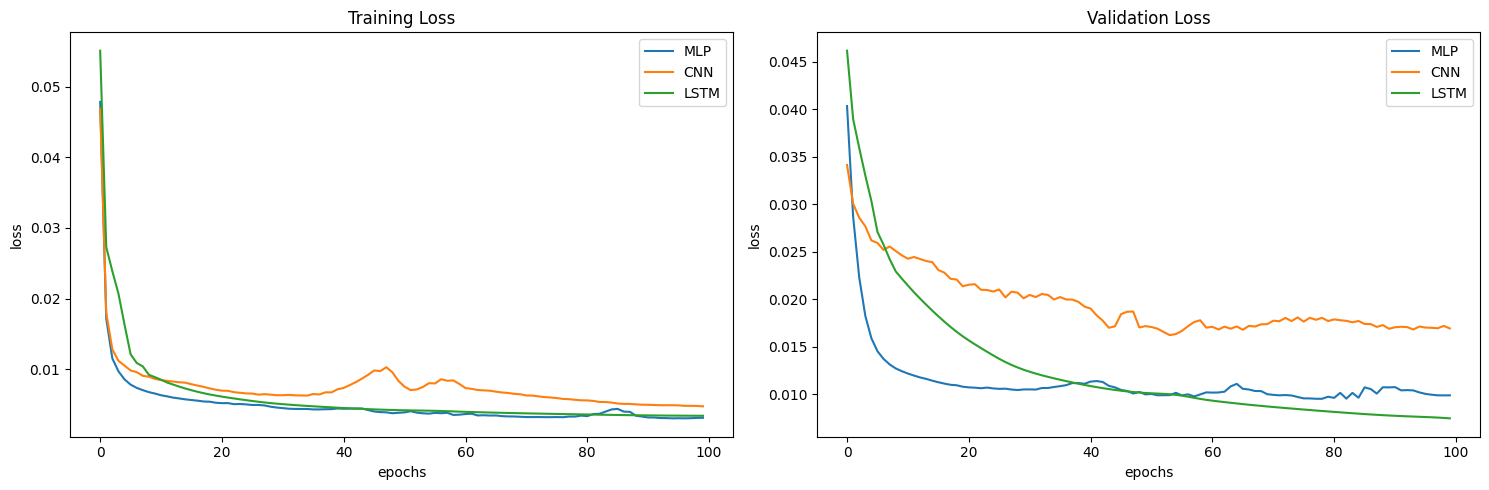

In [46]:
# 검증 손실 확인

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.plot(hist_mlp.history['loss'], label='MLP')
ax1.plot(hist_cnn.history['loss'], label='CNN')
ax1.plot(hist_lstm.history['loss'], label='LSTM')

ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend(loc='best')
ax1.set_title('Training Loss')

ax2.plot(hist_mlp.history['val_loss'], label='MLP')
ax2.plot(hist_cnn.history['val_loss'], label='CNN')
ax2.plot(hist_lstm.history['val_loss'], label='LSTM')

ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend(loc='best')
ax2.set_title('Validation Loss')

fig.tight_layout()
plt.show()

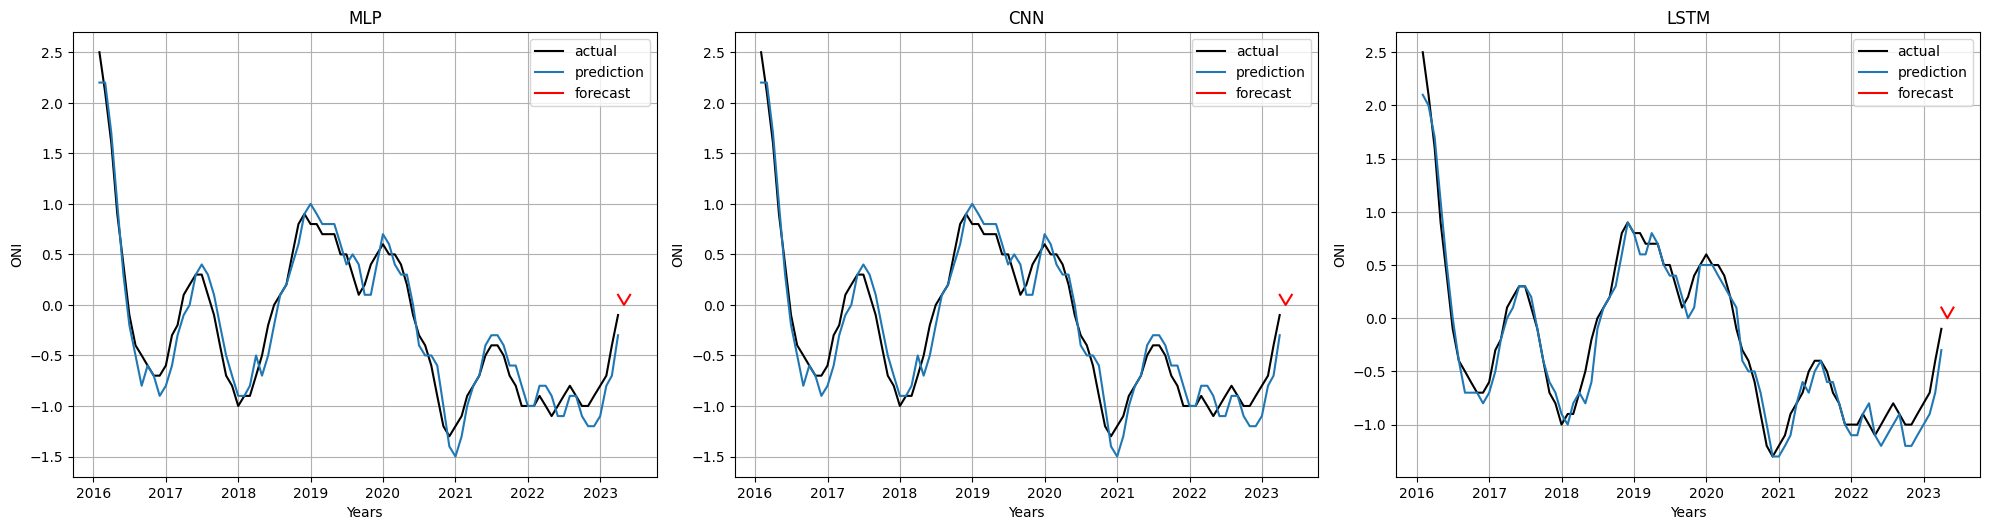

In [47]:
# 모델 비교 결과
y_start = n_train + n_valid + 1

# 실제 ONI 값
y_actual = pd.DataFrame(index = df_reframed.index[y_start:],
                        data = y_scaler.inverse_transform(y_test)[:-1, 0])

# 예측 ONI 값
y_predict = pd.DataFrame(index = df_reframed.index[y_start:],
                         data = {'MLP': yhat_mlp[:-1, 0],
                                 'CNN': yhat_mlp[:-1, 0],
                                 'LSTM': yhat_lstm[:-1, 0],
                                })

# 예측된 다음 3개월의 ONI 값
y_forecast = pd.DataFrame(index = pd.date_range(start=df_reframed.index[-1], 
                                                periods=n_out, freq= 'MS'),
                          data = {'MLP': yhat_mlp[-1, :],
                                  'CNN': yhat_mlp[-1, :],
                                  'LSTM': yhat_lstm[-1, :],
                                 })

# 데이터프레임으로 변환
plt.figure(figsize=(20, 10))
for i, model in enumerate(models):
    plt.subplot(2, 3, i + 1)
    plt.plot(y_actual, label='actual', color='k')
    plt.plot(y_predict[model], label='prediction')
    plt.plot(y_forecast[model], label='forecast', color='r')
    plt.xlabel('Years')
    plt.ylabel('ONI')
    plt.legend(loc='upper right')
    plt.title(f'{model}')
    plt.grid()
plt.tight_layout()
plt.show()